In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("data/shopping_behavior.csv")

In [5]:
# Convert categorical variables into numerical representations using one-hot encoding
categorical_cols = ['Gender', 'Category', 'Size', 'Color', 'Subscription Status', 'Discount Applied']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Normalize numerical features to ensure they are on the same scale
numerical_cols = ['Age', 'Review Rating']
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the preprocessed dataset
print(data_encoded.head())

   Customer ID       Age Item Purchased  Purchase Amount (USD)       Location  \
0            1  0.711538         Blouse                     53       Kentucky   
1            2  0.019231        Sweater                     64          Maine   
2            3  0.615385          Jeans                     73  Massachusetts   
3            4  0.057692        Sandals                     90   Rhode Island   
4            5  0.519231         Blouse                     49         Oregon   

   Season  Review Rating  Shipping Type Promo Code Used  Previous Purchases  \
0  Winter           0.24        Express             Yes                  14   
1  Winter           0.24        Express             Yes                   2   
2  Spring           0.24  Free Shipping             Yes                  23   
3  Spring           0.40   Next Day Air             Yes                  49   
4  Spring           0.08  Free Shipping             Yes                  31   

   ... Color_Silver Color_Teal  Color_

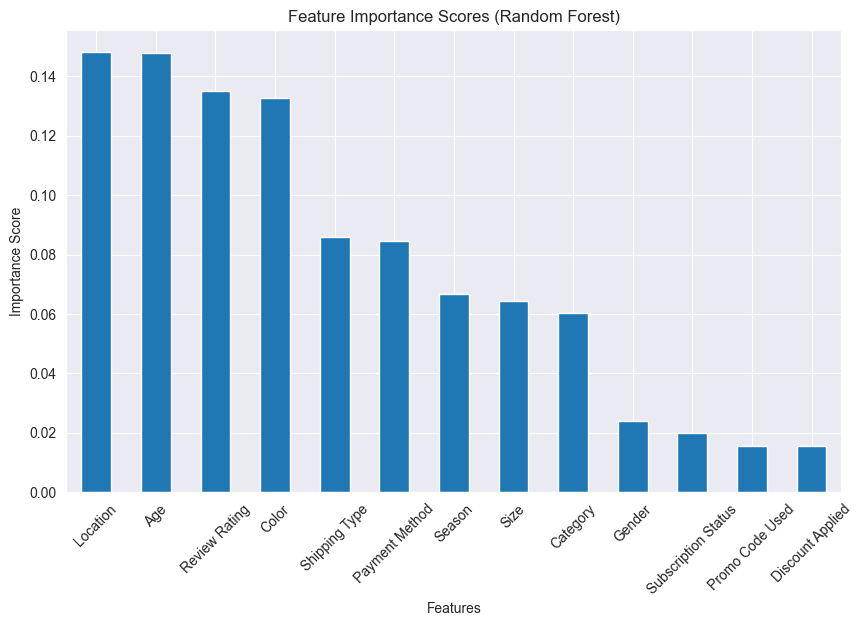

In [9]:
# Select relevant features and target variables
X = data.drop(columns=["Customer ID", "Item Purchased", "Frequency of Purchases",
                       "Purchase Amount (USD)", "Previous Purchases"])
y_frequency = data["Frequency of Purchases"]
y_previous = data["Previous Purchases"]
y_subscription = data["Subscription Status"]
y_review = data["Review Rating"]

# Preprocess categorical variables using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in X_encoded.columns:
    if X_encoded[column].dtype == "object":
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_frequency, test_size=0.2, random_state=42)

# Train a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance scores
feature_importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importance scores
plt.figure(figsize=(10, 6))
feature_importances.plot(kind="bar")
plt.title("Feature Importance Scores (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

In [10]:
feature_importances

Location               0.148083
Age                    0.147690
Review Rating          0.134964
Color                  0.132582
Shipping Type          0.085982
Payment Method         0.084524
Season                 0.066775
Size                   0.064378
Category               0.060261
Gender                 0.023861
Subscription Status    0.019951
Promo Code Used        0.015481
Discount Applied       0.015468
dtype: float64